# Notebook Analysis Online Retailer <br>
dataset : https://archive.ics.uci.edu/dataset/352/online+retail


## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Import Dataset

In [2]:
data = pd.read_excel('Online Retail.xlsx')

## General Information

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Data Size
print(f"Columns  : {data.shape[1]} Columns")
print(f"Rows data : {data.shape[0]} Rows")

Columns  : 8 Columns
Rows data : 541909 Rows


In [5]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Statistic Information
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## EDA

In [8]:
# Duplicated data
data_edited = data.copy()

In [9]:
# Data missing values
data_edited.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data_edited.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Drop duplicated rows
data_edited = data_edited.drop_duplicates()
print(f"New Rows : {data_edited.shape[0]} rows")

New Rows : 536641 rows


In [12]:
# # Drop data NA
data_edited = data_edited.dropna()
print(f"New Rows : {data_edited.shape[0]} rows")

New Rows : 401604 rows


There are rows with illogical values <br>
example : <br>
- Quantity < 0 or Excessive Quantity  <br>
- UnitPrice < 0 <br>
Solution -> Drop rows

In [13]:
idx_quan = data_edited[data_edited['Quantity'] < 0].index.to_list()

In [14]:
data_edited.drop(idx_quan,inplace=True)

In [15]:
# drop the illogical values

data_edited.drop(index=data_edited[data_edited['Quantity']  > 2000 ].index,inplace=True)

We don't drop the UnitPrice because it already dropped at previous tuning

Verify

In [16]:
data_edited.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392711.000000,392711,392711.000000,392711.000000
mean,12.593902,2011-07-10 19:18:08.374707712,3.125715,15287.757720
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,2000.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,38.037783,NaN,22.241313,1713.569468


In [17]:
data_edited.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
data_edited.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
# New Rows and Columns
print(f"Rows  : {data_edited.shape[0]}")
print(f"Columns  : {data_edited.shape[1]}")

Rows  : 392711
Columns  : 8


In [20]:
print(f"Row differences : {data.shape[0] - data_edited.shape[0]}")
print(f"Column differences : {data.shape[1] - data_edited.shape[1]}")

Row differences : 149198
Column differences : 0


In [21]:
# Copy back the data_edited to original data
data = data_edited.copy()

## Data Insight

In [22]:
# Copy the data
datac = data.copy()

### Retailing Based on Continent

In [23]:
# Import relevant library
import pycountry_convert as pc

In [24]:
# Function to get the continent from country name
def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

In [25]:
datac['Continent'] = datac['Country'].apply(get_continent)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [26]:
continent_count = ((datac['Continent'].value_counts()))
continent_name = datac['Continent'].value_counts().index.to_list()
log_continent = np.log(continent_count)
log_continent

Continent
Europe           12.851347
Unknown           9.028099
Asia              7.332369
Oceania           7.076654
North America     5.799093
South America     3.465736
Name: count, dtype: float64

In [27]:
datac.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Continent'],
      dtype='object')

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

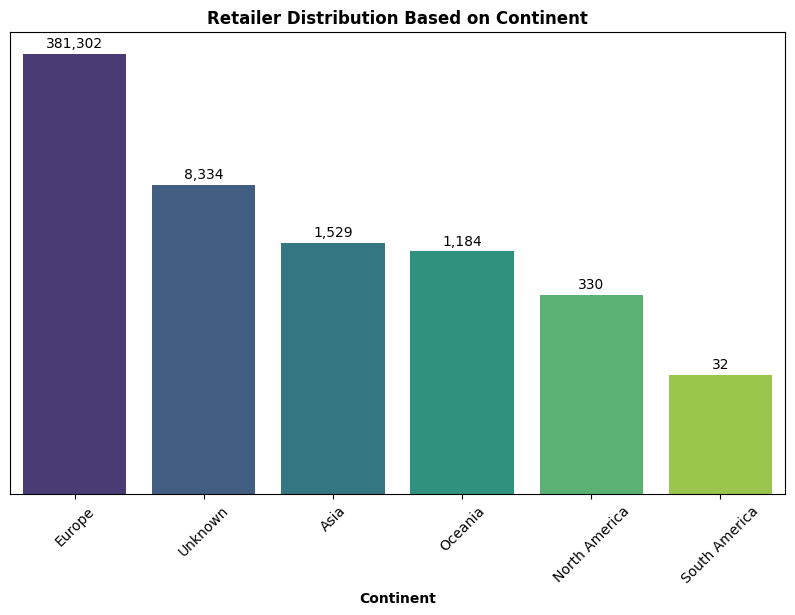

In [28]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=log_continent.index,y=log_continent,palette='viridis',hue=log_continent.index)

for i, v in enumerate(continent_count.values):
    ax.text(i, np.log(v) + 0.1, "{:,}".format(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Retailer Distribution Based on Continent',weight='bold')
plt.xlabel('Continent',weight='bold')
plt.ylabel('')
plt.yticks([])
plt.show()

-> There are 381,302 payment happens in Europe ; 1,529 in Asia ; 1,184 in Oceania ; 330 in North America ; 32 in South America

### Expense for Each Continent

<Figure size 2000x1200 with 0 Axes>

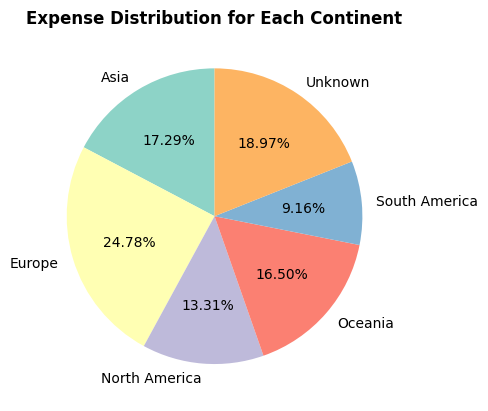

In [29]:
pt = datac.pivot_table(index='Continent',values=['UnitPrice','Quantity'],aggfunc='sum')

pt['Expense'] = pt['Quantity'] * pt['UnitPrice']

# Log Transformation for Expense
plt.figure(figsize=(20,12))
pt['log_expense'] = np.log(pt['Expense'])

ax = pt.plot(kind='pie',y='log_expense',legend=False,autopct = '%.2f%%',startangle=90,colors =sns.color_palette('Set3'))


plt.title('Expense Distribution for Each Continent',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('')
plt.show()

-> Europe with highest expense followed by Asia, North America, Oceania, and South America


### Trend Retail

In [30]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

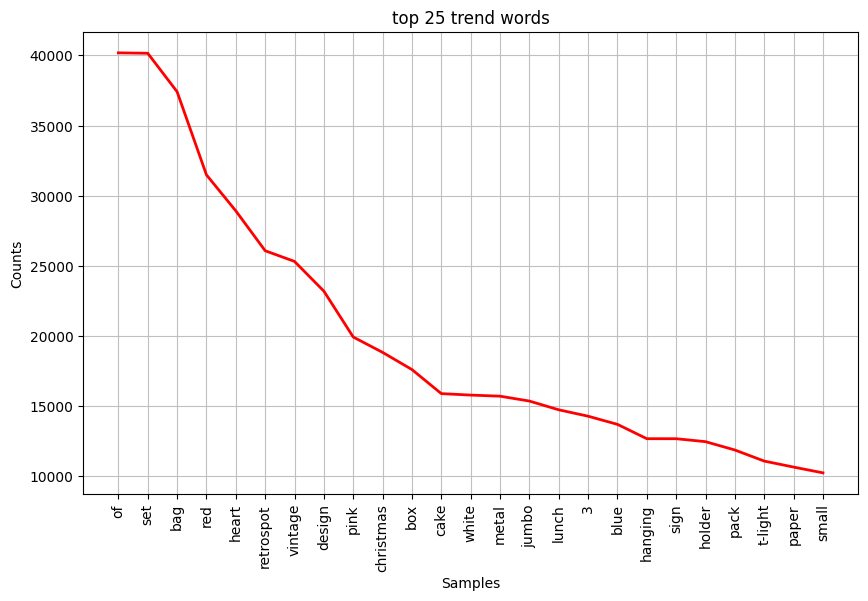

In [31]:
descriptions = ' '.join(datac['Description'].astype(str).tolist()).lower()
tokens = word_tokenize(descriptions)

word_freq = FreqDist(tokens)

plt.figure(figsize=(10, 6))
word_freq.plot(25,color='red',title='top 25 trend words')
plt.show()

From here the most frequent items in online retail are:<br>
- bag<br>
- box<br>
- pack <br>
- paper <br>
- sign <br>
- holder<br>
- t-light<br>
- etc <br>

-> these items are related to christmas event ( as christmas includes in trend words ) <br>
-> Christmas is in December, does it mean many people buy item when December? <br>
-> and it opens a new question : <h3>what month with the most Frequent Retail?<h3>

### Month with the most Frequent Retailing

In [32]:
datac.InvoiceDate.dt.year.value_counts().index.to_list()
#"There are only 2 (two) years : 2010 and 2011"

[2011, 2010]

In [33]:
# Sort the value
month_count = datac.InvoiceDate.dt.month.value_counts().sort_index()


In [34]:
month_count.index = month_count.index.map({
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
})

In [35]:
month_count

InvoiceDate
January      20989
February     19703
March        26871
April        22434
May          28073
June         26926
July         26581
August       26795
September    39671
October      48794
November     63178
December     42696
Name: count, dtype: int64

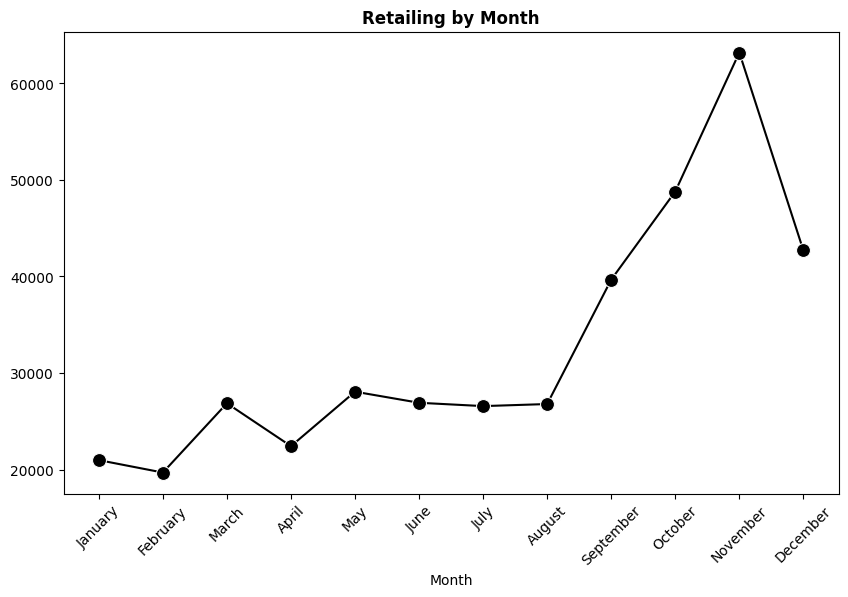

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x= month_count.index,y=month_count,marker='.',markersize=20,color='black')

plt.title('Retailing by Month',weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('')
plt.show()

-> November is the month with peak retailing followed by October, December , and September <br>
-> They are 4 months before end of the year <br>
<b>CONCLUSION : People buy more often in the end of year 